In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_df = clinical_trial_data.merge(mouse_drug_data,on='Mouse ID',how='left')

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = pd.DataFrame(merged_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean())

# Convert to DataFrame
mean_tumor_volume = mean_tumor_volume.reset_index()

# Preview DataFrame
mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_volume = pd.DataFrame(merged_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem())

# Convert to DataFrame
sem_volume = sem_volume.reset_index()

# Preview DataFrame
sem_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mungled_mean = mean_tumor_volume.pivot(index = 'Timepoint', columns ='Drug')

mungled_sem = sem_volume.pivot(index = "Timepoint", columns = "Drug")

# Preview that Reformatting worked
mungled_mean.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

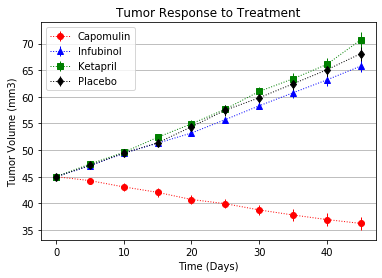

In [17]:
# Generate the Plot (with Error Bars). Treatments (Capomulin, Infubinol, Ketapril, and Placebo)
plt.errorbar(mungled_mean.index, mungled_mean["Tumor Volume (mm3)"]["Capomulin"], color = "red", linestyle = 'dotted',linewidth=1,marker = "o", label = "Capomulin", yerr = mungled_sem["Tumor Volume (mm3)"]["Capomulin"])
plt.errorbar(mungled_mean.index, mungled_mean["Tumor Volume (mm3)"]["Infubinol"], color = "blue", linestyle = 'dotted',linewidth=1,marker = "^", label = "Infubinol", yerr = mungled_sem["Tumor Volume (mm3)"]["Infubinol"])
plt.errorbar(mungled_mean.index, mungled_mean["Tumor Volume (mm3)"]["Ketapril"], color = "green", linestyle = 'dotted',linewidth=1,marker = "s", label = "Ketapril", yerr = mungled_sem["Tumor Volume (mm3)"]["Ketapril"])
plt.errorbar(mungled_mean.index, mungled_mean["Tumor Volume (mm3)"]["Placebo"], color = "black", linestyle = 'dotted',linewidth=1,marker = "d", label = "Placebo", yerr = mungled_sem["Tumor Volume (mm3)"]["Placebo"])

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.legend()

ax = plt.axes() 
ax.yaxis.grid()

# Save the Figure
plt.savefig("tumor_response.png")

In [18]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_df = merged_df[["Drug", "Timepoint", "Metastatic Sites"]]

# Convert to DataFrame
meta_mean = meta_df.groupby(["Drug", "Timepoint"]).mean()

# Preview DataFrame
meta_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [22]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
meta_sem = meta_df.groupby(["Drug", "Timepoint"]).sem()

# Preview DataFrame
meta_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [27]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean_pivot = meta_mean.reset_index().pivot(index = "Timepoint", columns = "Drug")

meta_sem_pivot = meta_sem.reset_index().pivot(index = "Timepoint", columns = "Drug")

# Preview that Reformatting worked
meta_mean_pivot

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

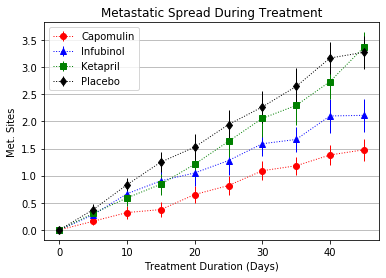

In [29]:
# Generate the Plot (with Error Bars)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Metastatic Sites"]["Capomulin"], color = "red", linestyle = 'dotted',linewidth=1,marker = "o", label = "Capomulin", yerr = meta_sem_pivot["Metastatic Sites"]["Capomulin"])
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Metastatic Sites"]["Infubinol"], color = "blue", linestyle = 'dotted',linewidth=1,marker = "^", label = "Infubinol", yerr = meta_sem_pivot["Metastatic Sites"]["Infubinol"])
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Metastatic Sites"]["Ketapril"], color = "green", linestyle = 'dotted',linewidth=1,marker = "s", label = "Ketapril", yerr = meta_sem_pivot["Metastatic Sites"]["Ketapril"])
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Metastatic Sites"]["Placebo"], color = "black", linestyle = 'dotted',linewidth=1,marker = "d", label = "Placebo", yerr = meta_sem_pivot["Metastatic Sites"]["Placebo"])

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.legend()

ax = plt.axes() 
ax.yaxis.grid()

# Save the Figure
plt.savefig("metastatic_spread.png")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [30]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_df = merged_df[["Drug", "Timepoint", "Mouse ID"]]
mouse_count = mouse_df.groupby(["Drug", "Timepoint"]).count().reset_index()

# Convert to DataFrame
mouse_count.rename(columns = {'Mouse ID':'Mouse Count'}, inplace = True) 

# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [34]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count.rename(columns = {'Mouse Count':'Mouse ID'}, inplace = True)
mouse_pivot = mouse_count.reset_index().pivot("Timepoint", "Drug", "Mouse ID")

# Preview the Data Frame
mouse_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


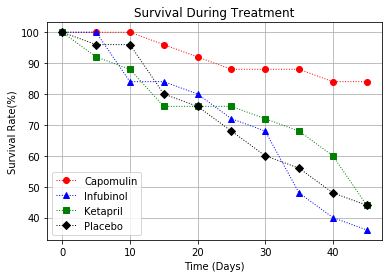

In [35]:
# Generate the Plot (Accounting for percentages)
survival_rate = ((mouse_pivot.loc[:]/mouse_pivot.loc[0])*100)
plt.plot (survival_rate.index,survival_rate['Capomulin'],marker = 'o',color = "red",linestyle = 'dotted',linewidth=1,label = "Capomulin")
plt.plot (survival_rate.index,survival_rate['Infubinol'],marker = '^',color = "blue",linestyle = 'dotted',linewidth=1,label = "Infubinol")
plt.plot (survival_rate.index,survival_rate['Ketapril'],marker = 's',color = "green",linestyle = 'dotted',linewidth=1,label = "Ketapril")
plt.plot (survival_rate.index,survival_rate['Placebo'],marker = 'D',color = "black",linestyle = 'dotted',linewidth=1,label = "Placebo")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("surival_rate.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [38]:
# Calculate the percent changes for each drug
summary_df = mean_tumor_volume.pivot("Timepoint", "Drug", "Tumor Volume (mm3)")
summary_df = (((summary_df.loc[45]-summary_df.loc[0])/summary_df.loc[0])*100)

# Display the data to confirm
summary_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

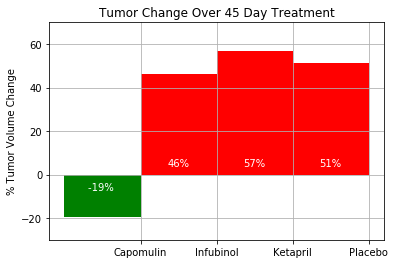

In [40]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (summary_df["Capomulin"],
                        summary_df["Infubinol"],
                        summary_df["Ketapril"],
                        summary_df["Placebo"])
labels = ["Capomulin","Infubinol","Ketapril","Placebo"]

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
index = np.arange(len(percent_changes))  
width = 1
pass_drug = ax.bar(index[0], percent_changes[0], width, color='green')
fail_drug = ax.bar(index[1:], percent_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(index + 0.5)
ax.set_xticklabels(labels)
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def labelFail(items):
    for item in items:
        height = item.get_height()
        ax.text(item.get_x() + item.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def labelPass(items):
    for item in items:
        height = item.get_height()
        ax.text(item.get_x() + item.get_width()/2., -8,
                '%d%% ' % int(height),
                ha='center', va='bottom', color="white")
        
# Call functions to implement the function calls
labelPass(pass_drug)
labelFail(fail_drug)

# Save the Figure
fig.savefig("tumor_change.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)